# 1.1 Feature Engineering - Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

In [2]:
txn = pd.read_csv('Retail_Data_Transactions.csv')
txn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


2. The date-format in column ’trans_date’ is not standard. Create a new column ’txn_date’ from ’trans_date’ with pd.to_datetime and drop the column ’trans_date’.
1


In [3]:
txn['txn_date'] = pd.to_datetime(txn.trans_date)
txn = txn.drop(columns =['trans_date'])

In [4]:
txn

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


3. Identify the min() and max() of column ’txn date’.¶

In [5]:
txn_max = txn['txn_date'].max()
txn_max
# max(txn.txn_date)

Timestamp('2015-03-16 00:00:00')

In [6]:
txn_min = txn['txn_date'].min()
txn_min

Timestamp('2011-05-16 00:00:00')

4. Create the column ’ME DT’: the last day of the month in the ’trans date’ column. DateOffset objects is a simple way to do this in pandas.

In [7]:
txn['ME_DT']=MonthEnd(0)+txn.txn_date

In [8]:
txn

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30
...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30
124996,CS7232,38,2014-08-19,2014-08-31
124997,CS8731,42,2014-11-28,2014-11-30
124998,CS8133,13,2013-12-14,2013-12-31


5. Create the column ’YEAR’: the year in the ’trans_date’ column. DatetimeIndex with attribute .year will help you do so.

In [9]:
txn['Year'] = txn.txn_date.dt.year
#txn['Year'] = txn['txn_date'].dt.year

In [10]:
txn

,customer_id,tran_amount,txn_date,ME_DT,Year
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


# 1.2 Create features that capture annual spending

Here the approach is to capture the client’s annual spending. The rationale behind this approach is that the clients spend is not very frequent to capture in a monthly aggregation.

1. Using groupby and NamedAgg create clnt_annual_aggregations, the annual aggregations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation functions. A snapshot of the output table is shown below. Notice that the output is a typical MultiIndex pandas dataframe.

In [11]:
group_client=['customer_id','Year']
group_client

['customer_id', 'Year']

In [12]:
clnt_annual_aggreations = txn.groupby(group_client).agg(ann_txn_amt_sum = pd.NamedAgg(column = 'tran_amount',aggfunc = np.sum),
                                                         ann_txn_amt_ave = pd.NamedAgg(column = 'tran_amount',aggfunc = np.mean),
                                                         ann_txn_amt_std = pd.NamedAgg(column = 'tran_amount',aggfunc = 'std'),
                                                         ann_txn_amt_var = pd.NamedAgg(column = 'tran_amount',aggfunc = 'var'),
                                                         ann_txn_amt_sem = pd.NamedAgg(column = 'tran_amount',aggfunc = 'sem'),
                                                         ann_txn_amt_max = pd.NamedAgg(column = 'tran_amount',aggfunc = 'max'),
                                                         ann_txn_amt_min = pd.NamedAgg(column = 'tran_amount',aggfunc = 'min'),
                                                         ann_txn_cnt = pd.NamedAgg(column = 'tran_amount',aggfunc = 'count'))
                                                                                                     
                                                         
clnt_annual_aggreations                                                         
                                                         
                                                         
                                                         

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id Year                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id Year                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id Year                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1  
...                           ...          ...  
CS9000      2011               16            2  
            2012               37            4  
            2013               71            2  
            2014               16            4  
            2015               34            1  

[31140 rows x 8 columns]

2. Plot the histogram of the sum and count.

<AxesSubplot:xlabel='ann_txn_cnt', ylabel='Count'>

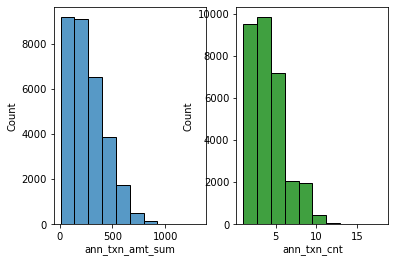

In [13]:
fig, ax = plt.subplots(1,2)
sns.histplot(data = clnt_annual_aggreations['ann_txn_amt_sum'], bins = 10,ax=ax[0])
sns.histplot(data = clnt_annual_aggreations['ann_txn_cnt'], bins = 10,ax=ax[1], color ='green')

3. Reset the index and reshape the table with the pivot_table function to create the clnt_annual_aggregations_pivot table shown below with 40 columns (why 40?). You should expect columns with NaN values. Impute the NaN entries when you perform the pivot table function and explain your choice of values.

In [14]:
clnt_annual_aggreations_pivot = pd.pivot_table(clnt_annual_aggreations.reset_index(),index=['customer_id'],columns =['Year'])
clnt_annual_aggreations_pivot



ann_txn_amt_ave                                              \
Year                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000        NaN   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000        NaN   
CS8997            45.000000  39.500000  35.166667  42.000000        NaN   
CS8998            64.000000  54.400000  47.000000  32.500000        NaN   
CS8999            52.000000  25.250000  28.000000  21.000000        NaN   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_max                            ... ann_txn_amt_var  \
Year                   2011   2012   2013  2014  2015  ...            2011   
customer_id                                            ...                   
CS1112                 96.0   81.0  105.0  90.0  39.0  ...      485.333333   
CS1113                 94.0   95.0   97.0  97.0  98.0  ...      444.333333   
CS1114                 97.0   97.0  105.0  95.0  79.0  ...       94.700000   
CS1115                102.0  104.0   94.0  98.0  55.0  ...      225.000000   
CS1116                 87.0  105.0   59.0  96.0   NaN  ...      449.583333   
...                     ...    ...    ...   ...   ...  ...             ...   
CS8996                 38.0   38.0   50.0  79.0   NaN  ...       98.000000   
CS8997                 47.0   49.0   75.0  45.0   NaN  ...        8.000000   
CS8998                 69.0   79.0   75.0  49.0   NaN  ...       50.000000   
CS8999                 64.0   30.0   39.0  24.0   NaN  ...      333.000000   
CS9000                 23.0   77.0   76.0  35.0  34.0  ...       24.500000   

                                                             ann_txn_cnt       \
Year               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333         NaN         3.0  5.0   
CS1113       290.200000   171.200000  781.666667  745.333333         3.0  5.0   
CS1114       968.000000   619.300000  726.166667         NaN         5.0  2.0   
CS1115       477.285714   110.952381  512.250000         NaN         3.0  7.0   
CS1116       908.333333          NaN  636.800000         NaN         4.0  3.0   
...                 ...          ...         ...         ...         ...  ...   
CS8996        20.333333   144.500000  481.600000         NaN         2.0  3.0   
CS8997        45.666667   441.366667   18.000000         NaN         2.0  4.0   
CS8998       505.300000  1568.000000  219.666667         NaN         2.0  5.0   
CS8999        21.583333   103.000000   18.000000         NaN         3.0  4.0   
CS9000       281.333333    12.500000   68.250000         NaN         2.0  4.0   

                            
Year        2013 2014 2015  
customer_id                 
CS1112       3.0  3.0  1.0  
CS1113       5.0  4.0  3.0  
CS1114       5.0  6.0  1.0  
CS1115       7.0  4.0  1.0  
CS1116       1.0  5.0  NaN  
...          ...  ...  ...  
CS8996       2.0  6.0  NaN  
CS8997       6.0  2.0  NaN  
CS8998       2.0  4.0  NaN  
CS8999       3.0  2.0  NaN  
CS9000       2.0  4.0  1.0  

[6889 rows x 40 columns]

In [15]:
clnt_annual_aggreations_pivot = clnt_annual_aggreations_pivot.fillna(0)

4. The pivoted object you created is a MultiIndex object with hierarchical indexes. You can see the first level (i.e. 0) in the snapshot above with names ’ann_txn_amt_ave’, ’ann_txn_amt_max’ (and more as indicated by the ...) and the second level (i.e. 1) with names ’2011’, ’2012’, etc. You can confirm the multiple levels of the columns with the following two expressions. What are your observations regarding the number of levels and the column names?

In [16]:
# hierachical index == 2

5. Finally, you want to save the dataframe clnt annual aggregations pivot as an .xlsx file for future use in the machine learning assignment. To do so, you want to remove the two levels in columns and create a single level with column names: ’ann txn amt ave 2011’, ’ann txn amt ave 2012’, etc. To do so, use the code snippet below prior to saving the dataframe as an Excel file. Describe what each line of code in the box does and save the output dataframe as an Excel file annual_features.xlsx. A snapshot of the desired final output is shown below.¶

In [17]:
clnt_annual_aggreations_pivot

ann_txn_amt_ave                                              \
Year                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000   0.000000   
CS8997            45.000000  39.500000  35.166667  42.000000   0.000000   
CS8998            64.000000  54.400000  47.000000  32.500000   0.000000   
CS8999            52.000000  25.250000  28.000000  21.000000   0.000000   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_max                            ... ann_txn_amt_var  \
Year                   2011   2012   2013  2014  2015  ...            2011   
customer_id                                            ...                   
CS1112                 96.0   81.0  105.0  90.0  39.0  ...      485.333333   
CS1113                 94.0   95.0   97.0  97.0  98.0  ...      444.333333   
CS1114                 97.0   97.0  105.0  95.0  79.0  ...       94.700000   
CS1115                102.0  104.0   94.0  98.0  55.0  ...      225.000000   
CS1116                 87.0  105.0   59.0  96.0   0.0  ...      449.583333   
...                     ...    ...    ...   ...   ...  ...             ...   
CS8996                 38.0   38.0   50.0  79.0   0.0  ...       98.000000   
CS8997                 47.0   49.0   75.0  45.0   0.0  ...        8.000000   
CS8998                 69.0   79.0   75.0  49.0   0.0  ...       50.000000   
CS8999                 64.0   30.0   39.0  24.0   0.0  ...      333.000000   
CS9000                 23.0   77.0   76.0  35.0  34.0  ...       24.500000   

                                                             ann_txn_cnt       \
Year               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333    0.000000         3.0  5.0   
CS1113       290.200000   171.200000  781.666667  745.333333         3.0  5.0   
CS1114       968.000000   619.300000  726.166667    0.000000         5.0  2.0   
CS1115       477.285714   110.952381  512.250000    0.000000         3.0  7.0   
CS1116       908.333333     0.000000  636.800000    0.000000         4.0  3.0   
...                 ...          ...         ...         ...         ...  ...   
CS8996        20.333333   144.500000  481.600000    0.000000         2.0  3.0   
CS8997        45.666667   441.366667   18.000000    0.000000         2.0  4.0   
CS8998       505.300000  1568.000000  219.666667    0.000000         2.0  5.0   
CS8999        21.583333   103.000000   18.000000    0.000000         3.0  4.0   
CS9000       281.333333    12.500000   68.250000    0.000000         2.0  4.0   

                            
Year        2013 2014 2015  
customer_id                 
CS1112       3.0  3.0  1.0  
CS1113       5.0  4.0  3.0  
CS1114       5.0  6.0  1.0  
CS1115       7.0  4.0  1.0  
CS1116       1.0  5.0  0.0  
...          ...  ...  ...  
CS8996       2.0  6.0  0.0  
CS8997       6.0  2.0  0.0  
CS8998       2.0  4.0  0.0  
CS8999       3.0  2.0  0.0  
CS9000       2.0  4.0  1.0  

[6889 rows x 40 columns]

In [18]:
level_0 = clnt_annual_aggreations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggreations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggreations_pivot.columns = level_0 + '_' + level_1

In [19]:
clnt_annual_aggreations_pivot

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,96.0,81.0,105.0,90.0,39.0,...,485.333333,161.800000,1190.333333,284.333333,0.000000,3.0,5.0,3.0,3.0,1.0
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,94.0,95.0,97.0,97.0,98.0,...,444.333333,290.200000,171.200000,781.666667,745.333333,3.0,5.0,5.0,4.0,3.0
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,97.0,97.0,105.0,95.0,79.0,...,94.700000,968.000000,619.300000,726.166667,0.000000,5.0,2.0,5.0,6.0,1.0
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,102.0,104.0,94.0,98.0,55.0,...,225.000000,477.285714,110.952381,512.250000,0.000000,3.0,7.0,7.0,4.0,1.0
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,87.0,105.0,59.0,96.0,0.0,...,449.583333,908.333333,0.000000,636.800000,0.000000,4.0,3.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,38.0,38.0,50.0,79.0,0.0,...,98.000000,20.333333,144.500000,481.600000,0.000000,2.0,3.0,2.0,6.0,0.0
CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,47.0,49.0,75.0,45.0,0.0,...,8.000000,45.666667,441.366667,18.000000,0.000000,2.0,4.0,6.0,2.0,0.0
CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,69.0,79.0,75.0,49.0,0.0,...,50.000000,505.300000,1568.000000,219.666667,0.000000,2.0,5.0,2.0,4.0,0.0


In [20]:
#clnt_annual_aggreations_pivot.to_excel(r'address')

# 1.3 Create monthly aggregations

Here, you want to explore the monthly sum of amounts and count of clients transactions.

1. Create the dataframe that captures the monthly sum and count of transactions per client (name it clnt_monthly_aggregations). Use the groupby function with the Named Aggregation feature which was introduced in pandas version 0.25.0. Make sure that you name the columns as shown in the figure sample on the right.

In [21]:
clnt_monthly_aggregations=txn.groupby(['customer_id','ME_DT']).agg(mth_txn_amt_sum = pd.NamedAgg(column = 'tran_amount', aggfunc = 'sum'),
                                         mth_txn_cnt = pd.NamedAgg(column='tran_amount', aggfunc = 'count'))

In [22]:
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
...                                 ...          ...
CS9000      2014-01-31               16            1
            2014-05-31               20            1
            2014-07-31               26            1
            2014-08-31               35            1
            2015-02-28               34            1

[103234 rows x 2 columns]

In [23]:
clnt_monthly_aggregations.loc['CS1112']

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


<AxesSubplot:xlabel='mth_txn_cnt', ylabel='Count'>

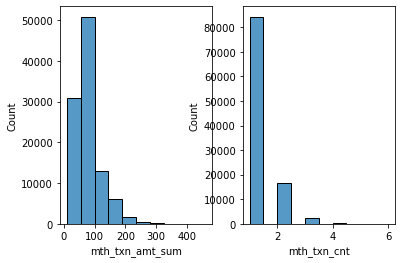

In [24]:
fig, ax = plt.subplots(1,2)
sns.histplot(data=clnt_monthly_aggregations['mth_txn_amt_sum'],bins = 10, ax = ax[0])
sns.histplot(data=clnt_monthly_aggregations['mth_txn_cnt'],bins = 10, ax = ax[1])

# 1.4 Create the base table for the rolling window features


In order to create the rolling window features (more on this in the next section), you need to create a base table with all possible combinations of ’customer id’ and ’ME DT’. For example, customer CS1112 should have 47 entries, one for each month, in which 15 will have the value of transaction amount and the rest 32 will have zero value for transaction amount. This will essentially help you convert the ”irregular” clnt monthly aggregations table into a ”regular” one.



1. Create the numpy array of the unique elements in columns ’customer_id’ and ’ME_DT’ of the txn table you created in section 1.1. Confirm that you have 6,889 unique clients and 47 unique month-end-dates.

In [25]:
# how many clients 
clnt_no=txn.customer_id.unique()

In [26]:
# the clients' name
txn.customer_id.unique()

array(['CS5295', 'CS4768', 'CS2122', ..., 'CS8409', 'CS8479', 'CS8077'],
      dtype=object)

In [27]:
me_dt=txn.ME_DT.unique()

2. Use itertools.product to generate all the possible combinations of ’customer id’ and ’ME DT’. Itertools is a Python module that iterates over data in a computation- ally efficient way. You can perform the same task with a for-loop, but the execution may be inefficient. For a brief overview of the Itertools module see here. If you named the numpy arrays with the unique elements: clnt no and me dt, then the code below will create an itertools.product object (you can confirm this by running: type(base table)).

In [28]:
from itertools import product
base_table = product(clnt_no, me_dt)

In [29]:
base_table

3. Next, you want to convert the itertools.product object base_table into a pandas object called base_table_pd. To do so, use pd.DataFrame.from records and name the columns ’CLNT_NO’ and ’ME_DT’.

In [30]:
base_table_pd = pd.DataFrame(base_table, columns = ['CLNT_NO','ME_DT'])
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2011-08-31
323779,CS8077,2012-09-30
323780,CS8077,2014-09-30
323781,CS8077,2014-02-28


4. Finally, you want to validate that you created the table you originally wanted. There are two checks you want to perform:
- Filter client CS1112 and confirm that the dates fall between the min and max month-dates you identified in section 1.1. Also, confirm that the snapshot of client CS1112 has 47 rows, one for each month in the dataset.
- Confirm that the base_table_pd has 323,783 rows, which is the expected value of combinations for 6,889 unique clients and 47 unique month-end dates.¶

In [31]:
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2011-08-31
323779,CS8077,2012-09-30
323780,CS8077,2014-09-30
323781,CS8077,2014-02-28


In [32]:
base_table_pd[base_table_pd['CLNT_NO']=='CS1112'].min()

CLNT_NO                 CS1112
ME_DT      2011-05-31 00:00:00
dtype: object

In [33]:
base_table_pd[base_table_pd['CLNT_NO']=='CS1112'].max()

CLNT_NO                 CS1112
ME_DT      2015-03-31 00:00:00
dtype: object

## 1.5 Create the monthly rolling window features

#### 1. Left-join the base_table_pd with the clnt_monthly_aggregations table from section 1.3 on [CLNT_NO, ME_DT] to create the table base_clnt_mth. Comment on the following questions in Markdown:

#### - Why do some rows have NaN values?
#### - What values will you choose to impute NaN values in the sum and count columns? Perform the imputation you suggest.
#### - Confirm that the number of rows is what you expect. What is the value?
#### - How are tables base clnt mth and clnt monthly aggregations different? Com- ment on the number of rows and the content of each table.

In [35]:
clnt_monthly_aggregations = clnt_monthly_aggregations.rename_axis(['CLNT_NO','ME_DT'])
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_cnt
CLNT_NO ME_DT                                   
CS1112  2011-06-30               56            1
        2011-08-31               96            1
        2011-10-31               60            1
        2012-04-30               56            1
        2012-06-30               52            1
...                             ...          ...
CS9000  2014-01-31               16            1
        2014-05-31               20            1
        2014-07-31               26            1
        2014-08-31               35            1
        2015-02-28               34            1

[103234 rows x 2 columns]

In [36]:
base_clnt_mth = base_table_pd.join(clnt_monthly_aggregations,on =['CLNT_NO','ME_DT'])
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,NaN,NaN
323780,CS8077,2014-09-30,NaN,NaN
323781,CS8077,2014-02-28,NaN,NaN


In [37]:
base_clnt_mth = base_clnt_mth.fillna(0)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,0.0,0.0
323780,CS8077,2014-09-30,0.0,0.0
323781,CS8077,2014-02-28,0.0,0.0


2. For the next step, the calculation of the rolling window features, you need to sort the data first by ’CLNT_NO’ and then by ’ME_DT’ in ascending order. This is necessary to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.

In [41]:
base_clnt_mth = base_clnt_mth.sort_values(by=['CLNT_NO','ME_DT'])
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,34.0,1.0


#### 3. The idea behind rolling window features is captured in the image below. You calculate some statistical properties (e.g. average) based on a window that is sliding. In the image below, the window is 7 which means that the last 7 points are used at every row to calculate the statistical property.
#### Here, you have to calculate separately the 3, 6 and 12-month rolling window features (tables: rolling_features_3M, rolling_features_6M, rolling_features_12M) for every client that calculates the aggregations ’sum’, mean’ and ’max’ for both columns ’mth_txn_amt_sum’ and ’mth_txn_cnt’. The steps to achieve this with base_clnt_mth as the starting dataframe are:
#### - groupby the client number
#### - select the two columns you want to aggregate
#### - use the rolling function with the appropriate windows 
#### - aggregate with ’sum’, mean’ and ’max’
#### The output of the 3-month rolling window dataframe is shown below. Also, answer the following questions in the .ipynb notebook as Markdown comments.
#### <div style='color:orange'>- Question: How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?

    
    
#### <div style='color:orange'>- Question: How many levels do the index and columns have? Are these MultiIndex dataframes?

    
#### Rename the columns as following: ’amt_sum_3M’, ’amt_mean_3M’, ’amt_max_3M’, ’txn_cnt_sum_3M’, ’txn_cnt_mean_3M’, ’txn_cnt_max_3M’ and follow the same naming convention for 6M and 12M.


In [42]:
rolling_features_3M = base_clnt_mth.groupby(by=['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(3).agg({'mth_txn_amt_sum':['sum','mean','max'],'mth_txn_cnt':['sum','mean','max']})



In [44]:
rolling_features_3M

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0
...                        ...        ...   ...         ...       ...  ...
CS9000  295140             0.0   0.000000   0.0         0.0  0.000000  0.0
        295126             0.0   0.000000   0.0         0.0  0.000000  0.0
        295119             0.0   0.000000   0.0         0.0  0.000000  0.0
        295136            34.0  11.333333  34.0         1.0  0.333333  1.0
        295114            34.0  11.333333  34.0         1.0  0.333333  1.0

[323783 rows x 6 columns]

## 1.6 Date-related features: date of the week

#### 1. The DatetimeIndex object you used earlier allows you to extract many components of a DateTime object. Here, you want to use the attributes dt.dayofweek and/or dt.day_name() to extract the day of the week from column ’txn_date’ of the txn table (with Monday=0, Sunday=6). The expected output below shows both columns.

In [46]:
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,Year
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013


In [47]:
txn['day_of_the_week']=txn['txn_date'].dt.dayofweek

In [48]:
txn['day_name'] = txn['txn_date'].dt.day_name()

In [49]:
txn

,customer_id,tran_amount,txn_date,ME_DT,Year,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


#### 2. Create the bar plot that shows the count of transactions per day of the week.

In [50]:
count_per_day = txn.groupby('day_of_the_week').count()

In [59]:
count_per_day['day_of_the_week'] = count_per_day.index
count_per_day['NUmber_of_the_transactions']=count_per_day.customer_id
count_per_day = count_per_day.iloc[:,1:]
count_per_day

,day_of_the_week,NUmber_of_the_transactions
day_of_the_week,,
0,0,17885
1,1,18031
2,2,18028
3,3,17796
4,4,17590
5,5,17929
6,6,17741


<AxesSubplot:xlabel='day_of_the_week'>

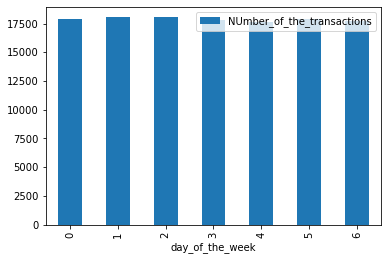

In [60]:
count_per_day.plot.bar(x='day_of_the_week',y='NUmber_of_the_transactions')